Importação das bibliotecas necessárias.

In [159]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Para facilitar o entendimento do banco de dados, exclui-se a coluna 13 que não é necessária e renomeia-se as colunas.

In [160]:
data = pd.read_csv("Dataset_spine.csv")
data = data.drop(['Unnamed: 13'], axis=1)
data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [161]:
y = data['class']
x = data.drop(['class'], axis = 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


**EXPERIMENTO 1**

Utiliza-se apenas 20% dos dados do banco de dados para usar como treinamento e o restante será alocado para uso no teste.

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

Utiliza-se três camadas de unidades de processamento intermediário, a função sigmoidal como função de ativação e 500 como númrero máximo de interações.

In [163]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64699710
Iteration 2, loss = 0.64178186
Iteration 3, loss = 0.63778467
Iteration 4, loss = 0.63550049
Iteration 5, loss = 0.63354912
Iteration 6, loss = 0.63184340
Iteration 7, loss = 0.63065593
Iteration 8, loss = 0.62907951
Iteration 9, loss = 0.62756442
Iteration 10, loss = 0.62573880
Iteration 11, loss = 0.62380375
Iteration 12, loss = 0.62154187
Iteration 13, loss = 0.61931788
Iteration 14, loss = 0.61665258
Iteration 15, loss = 0.61375022
Iteration 16, loss = 0.61085673
Iteration 17, loss = 0.60773244
Iteration 18, loss = 0.60399598
Iteration 19, loss = 0.59951720
Iteration 20, loss = 0.59434223
Iteration 21, loss = 0.58813329
Iteration 22, loss = 0.58217381
Iteration 23, loss = 0.57602792
Iteration 24, loss = 0.56878620
Iteration 25, loss = 0.56105643
Iteration 26, loss = 0.55279656
Iteration 27, loss = 0.54479204
Iteration 28, loss = 0.53567061
Iteration 29, loss = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=500, random_state=42, verbose=True)

In [164]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Como pode-se ver, chegou-se a uma acurácia de 82% utilizando essa configuração de MLP.

In [165]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



O relatório nos mostra que obteve-se uma *precision* de 88% nos casos anormais e 68% nos casos normais, e um *recall* de 86% nos casos anormais e 72% nos casos normais.

A sinalização de warning diz que o número limite de interações foi alcançado, porém a otmização ainda não convergiu. Iremos dobrar o número de interações e verificaremos como o MPL se comporta com os mesmos valores de hidden_layer_sizes e após com os valores dobrados hidden_layer_sizes.

**EXPERIMENTO 2**

O caso em que apenas duplicamos o número de interações

In [166]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)

s = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, loss = 0.49877042
Iteration 33, loss = 0.49079236
Iteration 34, loss = 0.48267256
Iteration 35, loss = 0.47408682
Iteration 36, loss = 0.46559063
Iteration 37, loss = 0.45766057
Iteration 38, loss = 0.44948514
Iteration 39, loss = 0.44238572
Iteration 40, loss = 0.43702578
Iteration 41, loss = 0.43196796
Iteration 42, loss = 0.42478124
Iteration 43, loss = 0.41859180
Iteration 44, loss = 0.41363341
Iteration 45, loss = 0.40927624
Iteration 46, loss = 0.40405530
Iteration 47, loss = 0.40019234
Iteration 48, loss = 0.39594084
Iteration 49, loss = 0.39179582
Iteration 50, loss = 0.38802776
Iteration 51, loss = 0.38437351
Iteration 52, loss = 0.38193176
Iteration 53, loss = 0.37792769
Iteration 54, loss = 0.37452595
Iteration 55, loss = 0.37279817
Iteration 56, loss = 0.37127401
Iteration 57, loss = 0.36826991
Iteration 58, loss = 0.36419292
Iteration 59, loss = 0.36115357
Iteration 60, loss = 0.35

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=1000, random_state=42, verbose=True)

In [167]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Tivemos um aumento da accuracy

In [168]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



Tivemos uma melhora de precision e recall para ambaos os casos, se comporado com o experimento anterior.

**EXPERIMENTO3**

Agora iremos verificar o comportamento do MPL quando dobrandos os valores para o hidden_layer_sizes.

In [169]:
clf = MLPClassifier(hidden_layer_sizes=(200,100,50,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.65445155
Iteration 2, loss = 0.63917334
Iteration 3, loss = 0.62999389
Iteration 4, loss = 0.62672357
Iteration 5, loss = 0.62598898
Iteration 6, loss = 0.62473913
Iteration 7, loss = 0.62163221
Iteration 8, loss = 0.61556801
Iteration 9, loss = 0.60834522
Iteration 10, loss = 0.59979065
Iteration 11, loss = 0.59252952
Iteration 12, loss = 0.58449774
Iteration 13, loss = 0.57515478
Iteration 14, loss = 0.56469295
Iteration 15, loss = 0.55212589
Iteration 16, loss = 0.53878341
Iteration 17, loss = 0.52473140
Iteration 18, loss = 0.50958594
Iteration 19, loss = 0.49649645
Iteration 20, loss = 0.48430963
Iteration 21, loss = 0.46855104
Iteration 22, loss = 0.45427329
Iteration 23, loss = 0.44510418
Iteration 24, loss = 0.43572529
Iteration 25, loss = 0.42434212
Iteration 26, loss = 0.41854495
Iteration 27, loss = 0.40999669
Iteration 28, loss = 0.40199925
Iteration 29, loss = 0.39639928
Iteration 30, loss = 0.38992296
Iteration 31, loss = 0.38501335
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 100, 50),
              max_iter=1000, random_state=42, verbose=True)

In [170]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8064516129032258

Verificamos uma melhora de 82 para 86% na accuracy.

In [171]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.86      0.86      0.86        44
      Normal       0.67      0.67      0.67        18

    accuracy                           0.81        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.81      0.81      0.81        62



Ao dobrar os valores da hidden_layer_sizes nós tivemos um aumento de pouco mais de 1% na acurácia, porém tivemos uma piora de precision tanto para os casos anormais quanto para os casos normais, enquanto o recall melhorou para os casos anormais e piorou para os casos normais.

In [172]:
y.value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Como o banco de dados é desbalanceado, visto o número de casos anormais e normais, o valor da acurácia não é um boa métrica para avaliar a MLP, portanto, deve-se atentar as métricas *precision* e *recall* do *report*, pois são elas que nos dirão se o MLP está classificando corretamente os casos. *Precision* se diz respeito a porcentagem dos casos selecionados daquela classe que foram classificados corretamente, já *recall* significa a porcentagem dos casos totais daquela classe que seriam classificados corretamente.

Vamos agora alterar alguns dos parâmetros da MLP:

**EXPERIMENTO 4**

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67024566
Iteration 2, loss = 0.64236872
Iteration 3, loss = 0.63358321
Iteration 4, loss = 0.63752815
Iteration 5, loss = 0.64198806
Iteration 6, loss = 0.64131365
Iteration 7, loss = 0.63844617
Iteration 8, loss = 0.63671240
Iteration 9, loss = 0.63381061
Iteration 10, loss = 0.62967288
Iteration 11, loss = 0.62449397
Iteration 12, loss = 0.62125073
Iteration 13, loss = 0.61740508
Iteration 14, loss = 0.61322855
Iteration 15, loss = 0.60866736
Iteration 16, loss = 0.60480839
Iteration 17, loss = 0.59977024
Iteration 18, loss = 0.59384897
Iteration 19, loss = 0.58738872
Iteration 20, loss = 0.58148577
Iteration 21, loss = 0.57477812
Iteration 22, loss = 0.56644647
Iteration 23, loss = 0.55708925
Iteration 24, loss = 0.54686711
Iteration 25, loss = 0.53596548
Iteration 26, loss = 0.52380761
Iteration 27, loss = 0.51139480
Iteration 28, loss = 0.49765665
Iteration 29, loss = 0.48454518
Iteration 30, loss = 0.47046950
Iteration 31, loss = 0.45711939
Iteration 32, los

Como pode-se ver a acurácia, *precison* e o *recall* não mudaram muito.

Vamos agora tentar descobrir quais são as melhores variáveis para utilizar no nosso banco de dados da MLP para tentar maximizar a precisão dos casos.

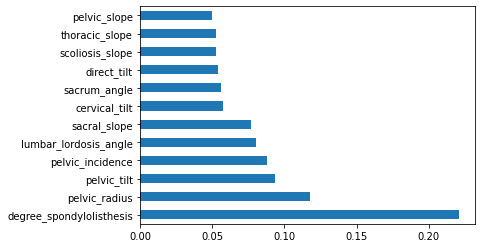

In [174]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

O gráfico nos mostra em ordem cresente as variáveis que mais impactam na classificação dos casos, logo, vamos descartar as primeiras 6 e utilizar o resto.

In [175]:
new_data = data[['degree_spondylolisthesis', 'pelvic_radius', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']]
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

**EXPERIMENTO 5**

Vamos treinar várias configurações de MLP para tentar descobrir uma possível boa implementação de MLP para o problema. 

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


Iteration 1, loss = 0.70112488
Iteration 2, loss = 0.68654367
Iteration 3, loss = 0.67462953
Iteration 4, loss = 0.66398732
Iteration 5, loss = 0.65432369
Iteration 6, loss = 0.64666128
Iteration 7, loss = 0.64006787
Iteration 8, loss = 0.63399689
Iteration 9, loss = 0.63055873
Iteration 10, loss = 0.62797376
Iteration 11, loss = 0.62460442
Iteration 12, loss = 0.62275161
Iteration 13, loss = 0.62038554
Iteration 14, loss = 0.61821419
Iteration 15, loss = 0.61588486
Iteration 16, loss = 0.61339693
Iteration 17, loss = 0.61064566
Iteration 18, loss = 0.60747443
Iteration 19, loss = 0.60388243
Iteration 20, loss = 0.60041992
Iteration 21, loss = 0.59622385
Iteration 22, loss = 0.59223184
Iteration 23, loss = 0.58780858
Iteration 24, loss = 0.58354370
Iteration 25, loss = 0.57911310
Iteration 26, loss = 0.57405196
Iteration 27, loss = 0.56849718
Iteration 28, loss = 0.56288560
Iteration 29, loss = 0.55697413
Iteration 30, loss = 0.55057633
Iteration 31, loss = 0.54448569
Iteration 32, los

**EXPERIMENTO 6**

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.92920079
Iteration 2, loss = 0.82382960
Iteration 3, loss = 0.74420212
Iteration 4, loss = 0.68556225
Iteration 5, loss = 0.65105628
Iteration 6, loss = 0.63663051
Iteration 7, loss = 0.63306369
Iteration 8, loss = 0.63498458
Iteration 9, loss = 0.63990479
Iteration 10, loss = 0.64611492
Iteration 11, loss = 0.64727877
Iteration 12, loss = 0.64367007
Iteration 13, loss = 0.63714182
Iteration 14, loss = 0.63000314
Iteration 15, loss = 0.62114728
Iteration 16, loss = 0.61419522
Iteration 17, loss = 0.60774688
Iteration 18, loss = 0.60491405
Iteration 19, loss = 0.60188012
Iteration 20, loss = 0.60046049
Iteration 21, loss = 0.59861906
Iteration 22, loss = 0.59550898
Iteration 23, loss = 0.59079922
Iteration 24, loss = 0.58449005
Iteration 25, loss = 0.57702586
Iteration 26, loss = 0.56996210
Iteration 27, loss = 0.56371703
Iteration 28, loss = 0.55889126
Iteration 29, loss = 0.55414330
Iteration 30, loss = 0.54803574
Iteration 31, loss = 0.53917196
Iteration 32, los

**EXPERIMENTO 7**

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 1.01597977
Iteration 2, loss = 0.45706383
Iteration 3, loss = 0.65186667
Iteration 4, loss = 0.55867127
Iteration 5, loss = 0.41518548
Iteration 6, loss = 0.43206902
Iteration 7, loss = 0.47590245
Iteration 8, loss = 0.43806173
Iteration 9, loss = 0.39114292
Iteration 10, loss = 0.40799969
Iteration 11, loss = 0.42346696
Iteration 12, loss = 0.40383657
Iteration 13, loss = 0.38132833
Iteration 14, loss = 0.39794158
Iteration 15, loss = 0.40669933
Iteration 16, loss = 0.39048103
Iteration 17, loss = 0.38168007
Iteration 18, loss = 0.38326778
Iteration 19, loss = 0.38375921
Iteration 20, loss = 0.37428225
Iteration 21, loss = 0.37173868
Iteration 22, loss = 0.37579583
Iteration 23, loss = 0.37145857
Iteration 24, loss = 0.36410900
Iteration 25, loss = 0.36495978
Iteration 26, loss = 0.36968524
Iteration 27, loss = 0.36241335
Iteration 28, loss = 0.35841003
Iteration 29, loss = 0.36592160
Iteration 30, loss = 0.36458271
Iteration 31, loss = 0.35424744
Iteration 32, los

**EXPERIMENTO 8**

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 5.71908057
Iteration 2, loss = 5.07543211
Iteration 3, loss = 3.98989017
Iteration 4, loss = 3.44086363
Iteration 5, loss = 0.85223806
Iteration 6, loss = 2.07914529
Iteration 7, loss = 1.49235852
Iteration 8, loss = 0.59352445
Iteration 9, loss = 1.34596246
Iteration 10, loss = 0.63664359
Iteration 11, loss = 0.75180113
Iteration 12, loss = 0.80186329
Iteration 13, loss = 0.42716413
Iteration 14, loss = 0.66248641
Iteration 15, loss = 0.53018090
Iteration 16, loss = 0.44042675
Iteration 17, loss = 0.54292012
Iteration 18, loss = 0.38493070
Iteration 19, loss = 0.42534572
Iteration 20, loss = 0.40565483
Iteration 21, loss = 0.34480990
Iteration 22, loss = 0.43545857
Iteration 23, loss = 0.35988394
Iteration 24, loss = 0.37670510
Iteration 25, loss = 0.33370036
Iteration 26, loss = 0.36433885
Iteration 27, loss = 0.33575231
Iteration 28, loss = 0.34941110
Iteration 29, loss = 0.32692301
Iteration 30, loss = 0.34334746
Iteration 31, loss = 0.33627455
Iteration 32, los

Pode-se ver que as últimas duas configurações de MLP apresentam excelentes resultados de acurácia, *precision* e *recall*, portanto, são possíveis boas candidatas a serem implementadas.

A equipe levantou a hipótese de que o fato de a quantidade de dados "Abnormal" estar acima da quantidade de dados "Normal" está baixando a precisão para classificação de dados "Normal" nos primeiros exemplos deste ralatório e baixando a acurácia geral nos dois exemplos acima (melhores resultados até então). Para testar isso, vamos igualar a quantidade de dados "Abnormal" e "Normal" com duas abordagens. Primeiro, expluindo os 110 primeiros dados "Abnormal" e depois, excluindo 110 dados "Abnormal" de modo aleatório.


**EXPERIMENTO 9**

Abaixo, segue o exemplo excluindo os 110 primeiros dados "Abnormal", utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima:

In [180]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70557907
Iteration 2, loss = 0.70216837
Iteration 3, loss = 0.69914504
Iteration 4, loss = 0.69651227
Iteration 5, loss = 0.69426537
Iteration 6, loss = 0.69238677
Iteration 7, loss = 0.69084330
Iteration 8, loss = 0.68958895
Iteration 9, loss = 0.68856457
Iteration 10, loss = 0.68769780
Iteration 11, loss = 0.68690556
Iteration 12, loss = 0.68610178
Iteration 13, loss = 0.68520861
Iteration 14, loss = 0.68416510
Iteration 15, loss = 0.68293005
Iteration 16, loss = 0.68147986
Iteration 17, loss = 0.67980555
Iteration 18, loss = 0.67790815
Iteration 19, loss = 0.67579307
Iteration 20, loss = 0.67346696
Iteration 21, loss = 0.67093678
Iteration 22, loss = 0.66821015
Iteration 23, loss = 0.66529510
Iteration 24, loss = 0.66219665
Iteration 25, loss = 0.65891446
Iteration 26, loss = 0.65543999
Iteration 27, loss = 0.65175675
Iteration 28, loss = 0.64784587
Iteration 29, loss = 0.64369002
Iteration 30, loss = 0.

Percebe-se que podemos alcançar resultados similares aos dois melhores resultados apresentados até então apenas com esta técnica.

Agora verificamos o que acontece se ao invés de removermos 110 casos 'Abnormal' nos adicionarmos 110 casos 'Normal' através da replicação de outros casos, para que o dataset fique igual

**EXPERIMENTO10**

In [181]:
data2 = pd.read_csv("Dataset_spine.csv")
data2 = data2.drop(['Unnamed: 13'], axis=1)
data2.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data2

new_data4 = new_data_copy.copy()
new_data5 = new_data_copy.copy()
new_data6 = new_data_copy.copy()

for i in range(210):
    new_data5.drop((i+1),axis=0,inplace=True)

for i in range(298):
    new_data6.drop((i+1),axis=0,inplace=True)
    
new_data4 = new_data4.append(new_data5, ignore_index=True)
new_data4 = new_data4.append(new_data6, ignore_index=True)

for i in range(2):
    new_data4.drop((i+1),axis=0,inplace=True)

y = new_data4['class']
x = new_data4.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      210
Abnormal    210
Name: class, dtype: int64
Iteration 1, loss = 0.70985117
Iteration 2, loss = 0.70219480
Iteration 3, loss = 0.69710815
Iteration 4, loss = 0.69423380
Iteration 5, loss = 0.69203732
Iteration 6, loss = 0.68938282
Iteration 7, loss = 0.68862488
Iteration 8, loss = 0.68725632
Iteration 9, loss = 0.68583953
Iteration 10, loss = 0.68377183
Iteration 11, loss = 0.68134456
Iteration 12, loss = 0.67853915
Iteration 13, loss = 0.67527539
Iteration 14, loss = 0.67183270
Iteration 15, loss = 0.66808823
Iteration 16, loss = 0.66409610
Iteration 17, loss = 0.65957494
Iteration 18, loss = 0.65438576
Iteration 19, loss = 0.64822100
Iteration 20, loss = 0.64164767
Iteration 21, loss = 0.63368043
Iteration 22, loss = 0.62505848
Iteration 23, loss = 0.61567113
Iteration 24, loss = 0.60555772
Iteration 25, loss = 0.59466328
Iteration 26, loss = 0.58319217
Iteration 27, loss = 0.57119916
Iteration 28, loss = 0.55852184
Iteration 29, loss = 0.54588097
Iteration 30, loss = 0.

Nota-se que os resultados melhoram signficativamente em relação aos primeiros testes do relatório e aos primeiros testes com número igual de testes por remoção, porém ainda não atingem os melhores resultados, verificamos agora com alguns parâmetros modificados

**EXPERIMENTO11**

In [182]:
data2 = pd.read_csv("Dataset_spine.csv")
data2 = data2.drop(['Unnamed: 13'], axis=1)
data2.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data2

new_data4 = new_data_copy.copy()
new_data5 = new_data_copy.copy()
new_data6 = new_data_copy.copy()

for i in range(210):
    new_data5.drop((i+1),axis=0,inplace=True)

for i in range(298):
    new_data6.drop((i+1),axis=0,inplace=True)
    
new_data4 = new_data4.append(new_data5, ignore_index=True)
new_data4 = new_data4.append(new_data6, ignore_index=True)

for i in range(2):
    new_data4.drop((i+1),axis=0,inplace=True)

y = new_data4['class']
x = new_data4.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      210
Abnormal    210
Name: class, dtype: int64
Iteration 1, loss = 5.42744866
Iteration 2, loss = 2.53286440
Iteration 3, loss = 2.48639308
Iteration 4, loss = 0.90714554
Iteration 5, loss = 1.17000653
Iteration 6, loss = 1.40889338
Iteration 7, loss = 0.70331221
Iteration 8, loss = 0.60487647
Iteration 9, loss = 0.73532418
Iteration 10, loss = 0.43564777
Iteration 11, loss = 0.56429343
Iteration 12, loss = 0.48336039
Iteration 13, loss = 0.32748067
Iteration 14, loss = 0.43502068
Iteration 15, loss = 0.33470777
Iteration 16, loss = 0.33213864
Iteration 17, loss = 0.33311993
Iteration 18, loss = 0.29199479
Iteration 19, loss = 0.31535870
Iteration 20, loss = 0.28145470
Iteration 21, loss = 0.28272648
Iteration 22, loss = 0.27976201
Iteration 23, loss = 0.26294978
Iteration 24, loss = 0.26406093
Iteration 25, loss = 0.25488540
Iteration 26, loss = 0.25391821
Iteration 27, loss = 0.24558351
Iteration 28, loss = 0.24420699
Iteration 29, loss = 0.23757313
Iteration 30, loss = 0.

Nota-se uma melhoria nos resultados em relação ao teste anterior, tornando-o um conjunto de parâmetros bem sólido, porém ele também não atinge as melhores métricas de outros experimentos.


**EXPERIMENTO 12**

Abaixo, segue o exemplo excluindo 110 dados "Abnormal" de forma randômica, utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima. A intenção, assim como no experimento passado, é igualar o número de casos "Abnormal" e "Normal", mas agora de modo randômico:

In [183]:
import random
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70527304
Iteration 2, loss = 0.70203427
Iteration 3, loss = 0.69920311
Iteration 4, loss = 0.69677368
Iteration 5, loss = 0.69473829
Iteration 6, loss = 0.69308015
Iteration 7, loss = 0.69176898
Iteration 8, loss = 0.69076168
Iteration 9, loss = 0.69000161
Iteration 10, loss = 0.68941929
Iteration 11, loss = 0.68893614
Iteration 12, loss = 0.68847117
Iteration 13, loss = 0.68795001
Iteration 14, loss = 0.68731349
Iteration 15, loss = 0.68652239
Iteration 16, loss = 0.68555756
Iteration 17, loss = 0.68441742
Iteration 18, loss = 0.68311349
Iteration 19, loss = 0.68166473
Iteration 20, loss = 0.68009142
Iteration 21, loss = 0.67840834
Iteration 22, loss = 0.67662095
Iteration 23, loss = 0.67472949
Iteration 24, loss = 0.67273223
Iteration 25, loss = 0.67062466
Iteration 26, loss = 0.66839864
Iteration 27, loss = 0.66604436
Iteration 28, loss = 0.66355237
Iteration 29, loss = 0.66091468
Iteration 30, loss = 0.

Percebe-se que as precisões e a acurácia aumentaram significativamente com relação aos primeiros testes deste ralatório, antes das melhorias sujeridas. Entretanto, apesar de os resultados serem satisfatórios, algumas das melhorias propostas acima, apresentam resultados melhores do que esta última abordagem..

**EXPERIMENTO 13**

Agora, uniremos a melhor abordagem para igualar a quantidade de casos que é retirar os 110 primeiros casos "Abnormal" do dataset com o melhor resultado das melhorias sugeridas na manipulação de parâmetros do MLP:

In [184]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.55375206
Iteration 2, loss = 8.87932277
Iteration 3, loss = 2.40768472
Iteration 4, loss = 0.83024323
Iteration 5, loss = 2.80373395
Iteration 6, loss = 2.19747852
Iteration 7, loss = 0.84871990
Iteration 8, loss = 0.19363533
Iteration 9, loss = 0.22319015
Iteration 10, loss = 0.60768334
Iteration 11, loss = 0.93623898
Iteration 12, loss = 0.79453655
Iteration 13, loss = 0.46104316
Iteration 14, loss = 0.25078411
Iteration 15, loss = 0.16912668
Iteration 16, loss = 0.18179545
Iteration 17, loss = 0.26101224
Iteration 18, loss = 0.34544551
Iteration 19, loss = 0.38223024
Iteration 20, loss = 0.35676346
Iteration 21, loss = 0.29218342
Iteration 22, loss = 0.21975913
Iteration 23, loss = 0.16907345
Iteration 24, loss = 0.15155934
Iteration 25, loss = 0.16478645
Iteration 26, loss = 0.19392532
Iteration 27, loss = 0.21190076
Iteration 28, loss = 0.20715269
Iteration 29, loss = 0.18248388
Iteration 30, loss = 0.

Percebemos que, apesar de significante melhora com relação aos primeiros experimentos e de resultados similares aos experimentos que testaram apenas melhorias nos parâmetros do MLP, este experimento ainda está aquém do resultado do experimento 7, onde apenas o dataset foi manipulado não randomicamente de forma a igualar o número de casos "Abnormal" e "Normal".

**EXPERIMENTO 14**

Agora tentaremos uma abordagem similar à do experimento anterior, unindo as melhorias nos parâmetros MLP com o ato de igualar o número de casos, mas agora de modo randômico:

In [185]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 1.92475204
Iteration 2, loss = 9.75004652
Iteration 3, loss = 6.27743985
Iteration 4, loss = 0.81780664
Iteration 5, loss = 2.62682503
Iteration 6, loss = 3.83733028
Iteration 7, loss = 3.14033956
Iteration 8, loss = 1.75878495
Iteration 9, loss = 0.74547971
Iteration 10, loss = 0.97991562
Iteration 11, loss = 1.82507418
Iteration 12, loss = 1.56744052
Iteration 13, loss = 0.82245317
Iteration 14, loss = 0.58697168
Iteration 15, loss = 0.77811539
Iteration 16, loss = 0.97663093
Iteration 17, loss = 1.05262099
Iteration 18, loss = 0.98623994
Iteration 19, loss = 0.81701065
Iteration 20, loss = 0.61119316
Iteration 21, loss = 0.45456961
Iteration 22, loss = 0.45969173
Iteration 23, loss = 0.60597912
Iteration 24, loss = 0.66032198
Iteration 25, loss = 0.53749211
Iteration 26, loss = 0.39426231
Iteration 27, loss = 0.37884415
Iteration 28, loss = 0.44192004
Iteration 29, loss = 0.48962869
Iteration 30, loss = 0.

Agora iremos verificar como ficam os valores de precision, accurary e recall, se mudarmos a proporção entre o set_train e set_test no caso em considerarços o DataSet original, o DataSet após a exclusão das 6 primeiras variáveis, e o DataSet após a exclusão de 110 casos anormais.

Mudando a proporção entre a quantidade de dados no conjunto de treinamento e a quantidade de dados no conjunto de teste. Deixaremos 40% para o conjunto de treinamento e 60% para o de teste.

No caso com o DataSet original:

**EXPERIMENTO15**

In [186]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67084220
Iteration 2, loss = 0.65056247
Iteration 3, loss = 0.63627528
Iteration 4, loss = 0.62758501
Iteration 5, loss = 0.62371144
Iteration 6, loss = 0.62340548
Iteration 7, loss = 0.62505864
Iteration 8, loss = 0.62707060
Iteration 9, loss = 0.62831042
Iteration 10, loss = 0.62829727
Iteration 11, loss = 0.62706532
Iteration 12, loss = 0.62493334
Iteration 13, loss = 0.62231877
Iteration 14, loss = 0.61961870
Iteration 15, loss = 0.61714005
Iteration 16, loss = 0.61506189
Iteration 17, loss = 0.61342285
Iteration 18, loss = 0.61213405
Iteration 19, loss = 0.61101758
Iteration 20, loss = 0.60986145
Iteration 21, loss = 0.60847490
Iteration 22, loss = 0.60673110
Iteration 23, loss = 0.60458702
Iteration 24, loss = 0.60207441
Iteration 25, loss = 0.59927404
Iteration 26, loss = 0.59628608
Iteration 27, loss = 0.59319626
Iteration 28, loss = 0.59004313
Iteration 29, loss = 0.58680274
Iteration 30, loss = 0.58339684
Iteration 31, loss = 0.57971684
Iteration 32, los

**EXPERIMENTO16**


Usando a mesma proporção de 40% e 60%, só que agora considerando a exclusão das 6 primeiras variáveis.

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.64213469
Iteration 2, loss = 0.63841274
Iteration 3, loss = 0.63509025
Iteration 4, loss = 0.63216771
Iteration 5, loss = 0.62964246
Iteration 6, loss = 0.62750346
Iteration 7, loss = 0.62573137
Iteration 8, loss = 0.62429749
Iteration 9, loss = 0.62316382
Iteration 10, loss = 0.62228613
Iteration 11, loss = 0.62161599
Iteration 12, loss = 0.62110181
Iteration 13, loss = 0.62068996
Iteration 14, loss = 0.62032672
Iteration 15, loss = 0.61996112
Iteration 16, loss = 0.61954754
Iteration 17, loss = 0.61904813
Iteration 18, loss = 0.61843453
Iteration 19, loss = 0.61768853
Iteration 20, loss = 0.61680243
Iteration 21, loss = 0.61577889
Iteration 22, loss = 0.61462996
Iteration 23, loss = 0.61337491
Iteration 24, loss = 0.61203705
Iteration 25, loss = 0.61063964
Iteration 26, loss = 0.60920158
Iteration 27, loss = 0.60773337
Iteration 28, loss = 0.60623522
Iteration 29, loss = 0.60469717
Iteration 30, loss = 0.60309919
Iteration 31, loss = 0.60141503
Iteration 32, los

No caso anterior, temos também a sinalização de warning que diz que o número limite de interações foi alcançado, porém a otmização ainda não convergiu. Iremos dobrar o número de interações e verificaremos como o MPL se comporta com os mesmos valores de hidden_layer_sizes e após com os valores dobrados hidden_layer_sizes.

**EXPERIMENTO17**

Primeiro iremos considerar apenas o caso em que o número de interações dobra:

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.64213469
Iteration 2, loss = 0.63841274
Iteration 3, loss = 0.63509025
Iteration 4, loss = 0.63216771
Iteration 5, loss = 0.62964246
Iteration 6, loss = 0.62750346
Iteration 7, loss = 0.62573137
Iteration 8, loss = 0.62429749
Iteration 9, loss = 0.62316382
Iteration 10, loss = 0.62228613
Iteration 11, loss = 0.62161599
Iteration 12, loss = 0.62110181
Iteration 13, loss = 0.62068996
Iteration 14, loss = 0.62032672
Iteration 15, loss = 0.61996112
Iteration 16, loss = 0.61954754
Iteration 17, loss = 0.61904813
Iteration 18, loss = 0.61843453
Iteration 19, loss = 0.61768853
Iteration 20, loss = 0.61680243
Iteration 21, loss = 0.61577889
Iteration 22, loss = 0.61462996
Iteration 23, loss = 0.61337491
Iteration 24, loss = 0.61203705
Iteration 25, loss = 0.61063964
Iteration 26, loss = 0.60920158
Iteration 27, loss = 0.60773337
Iteration 28, loss = 0.60623522
Iteration 29, loss = 0.60469717
Iteration 30, loss = 0.60309919
Iteration 31, loss = 0.60141503
Iteration 32, los


Tivemos uma melhora de precision e recall para ambaos os casos e também de accuracy, se comporado com o experimento anterior.

**EXPERIMENTO18**

Agora iremos verificar o comportamento do MPL quando dobrandos os valores para o hidden_layer_sizes.

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(200,100,50,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.65205510
Iteration 2, loss = 0.64048746
Iteration 3, loss = 0.63174406
Iteration 4, loss = 0.62564321
Iteration 5, loss = 0.62185780
Iteration 6, loss = 0.61987823
Iteration 7, loss = 0.61904405
Iteration 8, loss = 0.61863318
Iteration 9, loss = 0.61802537
Iteration 10, loss = 0.61683834
Iteration 11, loss = 0.61494447
Iteration 12, loss = 0.61240025
Iteration 13, loss = 0.60935619
Iteration 14, loss = 0.60598610
Iteration 15, loss = 0.60244391
Iteration 16, loss = 0.59883641
Iteration 17, loss = 0.59520863
Iteration 18, loss = 0.59154549
Iteration 19, loss = 0.58778303
Iteration 20, loss = 0.58382321
Iteration 21, loss = 0.57955850
Iteration 22, loss = 0.57490051
Iteration 23, loss = 0.56979795
Iteration 24, loss = 0.56423445
Iteration 25, loss = 0.55821807
Iteration 26, loss = 0.55176925
Iteration 27, loss = 0.54490779
Iteration 28, loss = 0.53765310
Iteration 29, loss = 0.53003509
Iteration 30, loss = 0.52210682
Iteration 31, loss = 0.51393628
Iteration 32, los

Tivemos uma melhora de precision e recall para ambaos os casos, se comporado com o experimento anterior.

Ao dobrar os valores da hidden_layer_sizes nós tivemos uma diminuição de cerca de 2% na acurácia, porém tivemos uma piora de precision para os casos anormais, enquanto o recall melhorou tanto para os casos anormais como para os normais.

**EXPERIMENTO19**


E agora considerando a mesma porporção de 40% e 60%, só que considerando a exclusão de 110 casos anormais.

In [191]:
y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70289048
Iteration 2, loss = 0.69986866
Iteration 3, loss = 0.69725069
Iteration 4, loss = 0.69503252
Iteration 5, loss = 0.69320618
Iteration 6, loss = 0.69175200
Iteration 7, loss = 0.69063436
Iteration 8, loss = 0.68980190
Iteration 9, loss = 0.68918882
Iteration 10, loss = 0.68871661
Iteration 11, loss = 0.68830028
Iteration 12, loss = 0.68785888
Iteration 13, loss = 0.68732631
Iteration 14, loss = 0.68665749
Iteration 15, loss = 0.68582850
Iteration 16, loss = 0.68483164
Iteration 17, loss = 0.68367007
Iteration 18, loss = 0.68235404
Iteration 19, loss = 0.68089671
Iteration 20, loss = 0.67930910
Iteration 21, loss = 0.67759752
Iteration 22, loss = 0.67576493
Iteration 23, loss = 0.67381299
Iteration 24, loss = 0.67174236
Iteration 25, loss = 0.66955174
Iteration 26, loss = 0.66723810
Iteration 27, loss = 0.66479773
Iteration 28, loss = 0.66222582
Iteration 29, loss = 0.65951464
Iteration 30, loss = 0.65665086
Iteration 31, loss = 0.65361563
Iteration 32, los

Checando os valores de precision, recall e accuracy para os três casos, podemos observar que a mudança de proporção de 20% para 40% do set_train, não resultou em melhoras significativas. Tivemos um pequeno aumento da accurary de 78% para 81%, porém no caso da precision dos casos anormais, por exemplo, tivemos uma diminuição de 1%.

**EXPERIMENTO20**

Irei realizar o mesmo experimento, porém agora o set_train terá 90% dos dados.

Com o dataSet original:

In [193]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.65852627
Iteration 2, loss = 0.62411831
Iteration 3, loss = 0.59582311
Iteration 4, loss = 0.57342462
Iteration 5, loss = 0.55656374
Iteration 6, loss = 0.54473558
Iteration 7, loss = 0.53729024
Iteration 8, loss = 0.53344647
Iteration 9, loss = 0.53233454
Iteration 10, loss = 0.53305675
Iteration 11, loss = 0.53475935
Iteration 12, loss = 0.53671007
Iteration 13, loss = 0.53835658
Iteration 14, loss = 0.53934625
Iteration 15, loss = 0.53950655
Iteration 16, loss = 0.53880771
Iteration 17, loss = 0.53732649
Iteration 18, loss = 0.53521152
Iteration 19, loss = 0.53265077
Iteration 20, loss = 0.52984265
Iteration 21, loss = 0.52697282
Iteration 22, loss = 0.52419829
Iteration 23, loss = 0.52163592
Iteration 24, loss = 0.51935306
Iteration 25, loss = 0.51736518
Iteration 26, loss = 0.51564305
Iteration 27, loss = 0.51412704
Iteration 28, loss = 0.51273852
Iteration 29, loss = 0.51138606
Iteration 30, loss = 0.50998662
Iteration 31, loss = 0.50848312
Iteration 32, los

**EXPERIMENTO21**

Usando a mesma proporção de 90% e 10%, só que agora considerando a exclusão das 6 primerias variáveis.

In [195]:
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70801206
Iteration 2, loss = 0.69644288
Iteration 3, loss = 0.68526906
Iteration 4, loss = 0.67448786
Iteration 5, loss = 0.66410456
Iteration 6, loss = 0.65412720
Iteration 7, loss = 0.64456431
Iteration 8, loss = 0.63542316
Iteration 9, loss = 0.62670896
Iteration 10, loss = 0.61842515
Iteration 11, loss = 0.61057376
Iteration 12, loss = 0.60315510
Iteration 13, loss = 0.59616731
Iteration 14, loss = 0.58960624
Iteration 15, loss = 0.58346632
Iteration 16, loss = 0.57774171
Iteration 17, loss = 0.57242696
Iteration 18, loss = 0.56751646
Iteration 19, loss = 0.56300327
Iteration 20, loss = 0.55887758
Iteration 21, loss = 0.55512508
Iteration 22, loss = 0.55172671
Iteration 23, loss = 0.54865970
Iteration 24, loss = 0.54589884
Iteration 25, loss = 0.54341777
Iteration 26, loss = 0.54119020
Iteration 27, loss = 0.53919122
Iteration 28, loss = 0.53739801
Iteration 29, loss = 0.53578966
Iteration 30, loss = 0.53434636
Iteration 31, loss = 0.53304866
Iteration 32, los

**EXPERIMENTO22**

E agora considerando a mesma porporção de 90% e 10%, só que considerando a exclusão de 110 casos anormais.

In [197]:
y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.75072691
Iteration 2, loss = 0.74277735
Iteration 3, loss = 0.73527198
Iteration 4, loss = 0.72821528
Iteration 5, loss = 0.72161107
Iteration 6, loss = 0.71546006
Iteration 7, loss = 0.70975790
Iteration 8, loss = 0.70449737
Iteration 9, loss = 0.69967048
Iteration 10, loss = 0.69526897
Iteration 11, loss = 0.69128427
Iteration 12, loss = 0.68770698
Iteration 13, loss = 0.68452593
Iteration 14, loss = 0.68172779
Iteration 15, loss = 0.67929824
Iteration 16, loss = 0.67722107
Iteration 17, loss = 0.67547542
Iteration 18, loss = 0.67403416
Iteration 19, loss = 0.67286465
Iteration 20, loss = 0.67193111
Iteration 21, loss = 0.67119701
Iteration 22, loss = 0.67062731
Iteration 23, loss = 0.67018910
Iteration 24, loss = 0.66985159
Iteration 25, loss = 0.66958583
Iteration 26, loss = 0.66936427
Iteration 27, loss = 0.66916098
Iteration 28, loss = 0.66895350
Iteration 29, loss = 0.66872527
Iteration 30, loss = 0.66846614
Iteration 31, loss = 0.66817013
Iteration 32, los

Assim que decidimos aumentar tão consideravelmente o set_train, pensamos que teríamos uma melhora no precision, recall e accuracy em todos os três casos, porém para os dois primeiros dataSets (o dataSets original e o dataSets que excluímos as 6 primeiras variavéis), tivemos uma piora muito significativa no recall para os casos normais e na accuracy para ambos os conjuntos de dados, já para o último dataSet (o que excluímos 110 casos anormais), obtivemos um excelente resultado para ambos os casos e uma accuracy de 96%.